# Lead Scoring - Logistic Regression

## Importing and Understanding Data

In [1289]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1291]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1293]:
# Importing the leads dataset
lead_data = pd.read_csv("leads.csv")

In [1295]:
# display the necessary columns and rows
pd.reset_option('display.max_columns')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [1297]:
lead_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Quality Check

In [1300]:
lead_data.shape

(9240, 37)

In [1302]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1304]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1306]:
### Mising values check

In [1308]:
#checking the null values
lead_data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [1310]:
#checking for duplicates
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Data Preparation

- Dropping the columns like **is_rainy Magazine,Receive More Updates About Our Courses, I agree to pay the amount through cheque, Update me on Supply Chain Content
and Get updates on DM Content** as these fields have only one value and willnot ne useful for prediction.

In [1314]:
lead_data.drop(['Magazine', 'Receive More Updates About Our Courses','I agree to pay the amount through cheque'
                ,'Update me on Supply Chain Content','Get updates on DM Content'], axis=1, inplace=True)

In [1316]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

## Handling NULL/Missing Values

- Dropping the columns like **Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index,
  Asymmetrique Activity Score,Asymmetrique Profile Score,** **Lead Profile** and **tags**.
- **Lead Source** also has 39% missing values. But it is an important field in terms of business context. So imputing it with 'Unknown'
- Missing vaues in **Last Activity** field is imputed with 'Unknown'
- Missing values in **Country** is imputed with 'India' as more than 95% of the values in the dataset has country as India.
- Missing values in **Specialization** is imputed with 'Not selected'.

- **How did you hear about X Education** has 23.8% null values and huge amount of data in select. So there is not enough variance in data and will not help in prediction. So dropping it.
- Missing values in **What is your current occupation** is imputed with 'Unknown'.
- Missing values in **What matters most to you in choosing a course** is imputed with 'Not selected'.
- Dropping the field **What matters most to you in choosing a course** as 29% of the data is missing and there is not enough variance in data
- Mising values in City are imputed with mode value.

- Dropping the rows where **TotalVisits** is missing.
  

In [1321]:
print(lead_data.isnull().mean() * 100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [1323]:
# Dropping the fields with more than 29% missing values
lead_data.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score'
               ,'Asymmetrique Profile Score','Lead Profile','Tags'], axis=1, inplace=True)

In [1325]:
# Looping over the categorical columns to calculate value counts as percentages
for column in lead_data.select_dtypes(include=['object']).columns:
        if lead_data[column].isnull().any():
         print(f"Value counts for {column} (in percentage):")
         value_counts_percent = lead_data[column].value_counts(normalize=True) * 100
         print(value_counts_percent)
         print("\n") 

Value counts for Lead Source (in percentage):
Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64


Value counts for Last Activity (in percentage):
Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead         

In [1327]:
#lead source has 39% missing values. but it is an important column in term of business. So we are imputing it with 'Unknown'
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Unknown')

In [1329]:
#Last Activity - Imputing it with 'Unknown'
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('Unknown')

In [1331]:
# 95% of the country name is India. So imputing missing values with 'India'
lead_data['Country'] = lead_data['Country'].fillna('India')

In [1333]:
#specialization has some values in Select and 15.5% null values
lead_data['Specialization'] = lead_data['Specialization'].fillna('Not Selected')

In [1335]:
# How did you hear about X Education has 23.8% null values and huge amount of data in select- there is not enough variance in data. So dropping it
lead_data.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [1337]:
#specialization has 24% values in Select and 15.5% null values
lead_data['Specialization'] = lead_data['Specialization'].fillna('Not Selected')

In [1339]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [1341]:
# Dropping as there is not enough variance in data
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('Not Selected')

In [1343]:
lead_data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [1345]:
#imputing the mode value for city
mode_value = lead_data['City'].mode()[0]
print(mode_value)
lead_data['City'] = lead_data['City'].fillna(mode_value)

Mumbai


In [1347]:
lead_data.isnull().mean()

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               0.014827
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.014827
Last Activity                             0.000000
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.291126
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations        

In [1349]:
# Removing NaN TotalCharges rows
lead_data = lead_data[~np.isnan(lead_data['TotalVisits'])]

### Rename the columns for easier use

### Handling the select value in the data

- select option in the data doesnt provide any meaningful value. So assuming that when the  visitors didnt select anything, it will be saved as 'select'

In [1354]:
#city -  imputing the select with notselected
lead_data['City']=lead_data['City'].replace({'Select': 'Not Selected'})

In [1356]:
#imputing the select with notselected
lead_data['Specialization']=lead_data['Specialization'].replace({'Select': 'Not Selected'})

## Cleaning the data

In [1359]:
lead_data['X Education Forums'].value_counts(normalize=True)

X Education Forums
No     0.99989
Yes    0.00011
Name: proportion, dtype: float64

In [1361]:
#99% of the data has only yes. Not enough variance to make prediction.
lead_data.drop(['X Education Forums'], axis=1, inplace=True)

Handling select

In [1364]:
# Loop over categorical columns and calculate value counts as percentages
for column in lead_data.select_dtypes(include=['object']).columns:
    if column != 'Prospect ID':
        print(f"Value counts for {column} (in percentage):")
        value_counts_percent = lead_data[column].value_counts(normalize=True) * 100
        print(value_counts_percent)
        print("\n")  # Adds a line break after each output

Value counts for Lead Origin (in percentage):
Lead Origin
Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: proportion, dtype: float64


Value counts for Lead Source (in percentage):
Lead Source
Google               31.506097
Direct Traffic       27.935845
Olark Chat           19.257388
Organic Search       12.677139
Reference             4.866528
Welingak Website      1.417115
Referral Sites        1.373174
Facebook              0.340547
Unknown               0.318576
bing                  0.065912
google                0.054927
Click2call            0.043942
Social Media          0.021971
Live Chat             0.021971
Press_Release         0.021971
Pay per Click Ads     0.010985
blog                  0.010985
WeLearn               0.010985
welearnblog_Home      0.010985
youtubechannel        0.010985
testone               0.010985
NC_EDM                0.010985
Name: proportion, d

In [1366]:
#lead origin - Lead Add Form and Lead Import are grouped into 'Other Leads' due to their small proportion
lead_data['Lead Origin']=lead_data['Lead Origin'].replace({'Lead Add Form': 'Other Leads', 'Lead Import': 'Other Leads'})
lead_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3578
Other Leads                 639
Name: count, dtype: int64

In [1368]:
#Correction the improper case
lead_data['Lead Source']=lead_data['Lead Source'].replace({'google': 'Google'})

In [1370]:
#Lead Source - Grouping the sources apart from Google',Olark Chat,Organic Search,Reference as Other sources as their proportions are very low.
lead_data['Lead Source']=lead_data['Lead Source'].apply(lambda x: x if x in ['Google', 'Olark Chat', 'Organic Search', 'Reference'] else 'Other sources')

In [1372]:
lead_data['Lead Source'].value_counts()

Lead Source
Other sources     2880
Google            2873
Olark Chat        1753
Organic Search    1154
Reference          443
Name: count, dtype: int64

In [1374]:
#Last Activity and last notabe activity are similar columns so dropping one field
lead_data.drop(['Last Notable Activity'], axis=1, inplace=True)

In [1376]:
#Last activity - Grouping values with small proportions as Other activity
lead_data['Last Activity']=lead_data['Last Activity'].apply(lambda x: x if x in ['Email Opened', 'SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Bounced'] else 'Other activity')

In [1378]:
#country -Grouping other countries apart from India, United States, United Arab Emirates as others
lead_data['Country']=lead_data['Country'].apply(lambda x: x if x in ['India', 'United States', 'United Arab Emirates'] else 'Others')

In [1380]:
#Specialization -  Grouping values with small proportions as Other specialization
lead_data['Specialization']=lead_data['Specialization'].apply(lambda x: x if x in ['Not Selected', 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance'] else 'Other specialization')

### Renaming the fields for better usability

In [1383]:
lead_data.rename(columns={'What is your current occupation': 'current_occupation'}, inplace=True)

In [1385]:
lead_data.rename(columns={'What matters most to you in choosing a course': 'factors_in_choosing_course'}, inplace=True)

In [1387]:
lead_data.rename(columns={'A free copy of Mastering The Interview': 'mastering_the_interview'}, inplace=True)

In [1389]:
#Mapping all the yes/no vars to 1/0
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','Newspaper'
            ,'Digital Advertisement','Through Recommendations','mastering_the_interview']

# Defining the map function
def binary_map(x):
    return x.replace({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [1391]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prospect ID                  9103 non-null   object 
 1   Lead Number                  9103 non-null   int64  
 2   Lead Origin                  9103 non-null   object 
 3   Lead Source                  9103 non-null   object 
 4   Do Not Email                 9103 non-null   int64  
 5   Do Not Call                  9103 non-null   int64  
 6   Converted                    9103 non-null   int64  
 7   TotalVisits                  9103 non-null   float64
 8   Total Time Spent on Website  9103 non-null   int64  
 9   Page Views Per Visit         9103 non-null   float64
 10  Last Activity                9103 non-null   object 
 11  Country                      9103 non-null   object 
 12  Specialization               9103 non-null   object 
 13  current_occupation     

**EDA

In [1394]:
#creating seperate numeraical and categorical arrays 
cat_cols=["Lead Origin","Lead Source","Last Activity","Country","Specialization","City","current_occupation","Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]
#num_cols=["Do Not Email","Do Not Call","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]
num_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

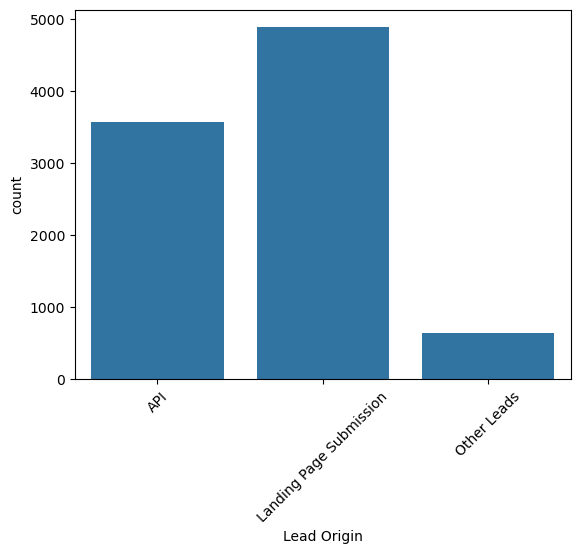

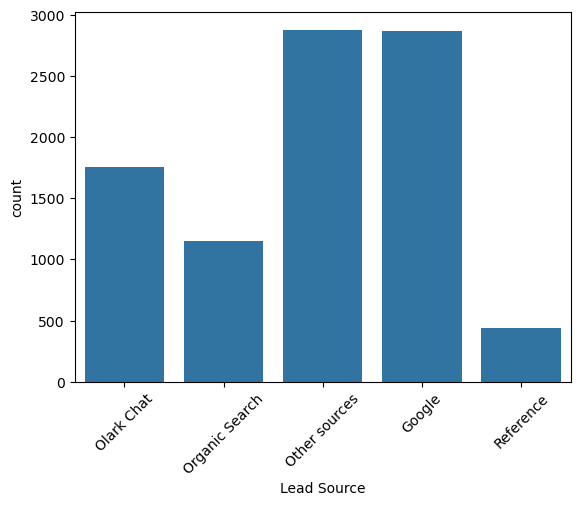

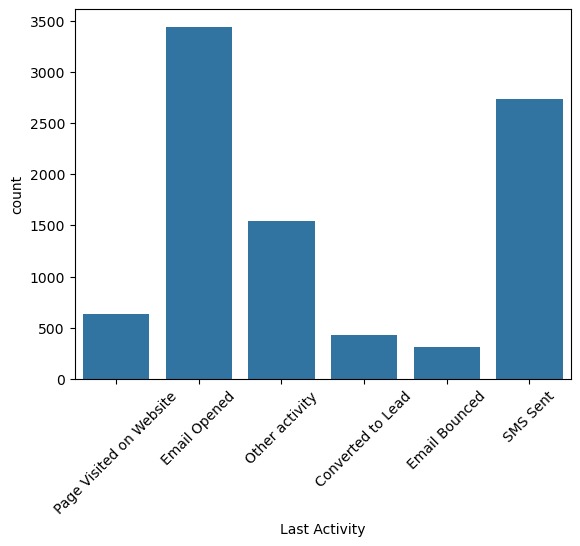

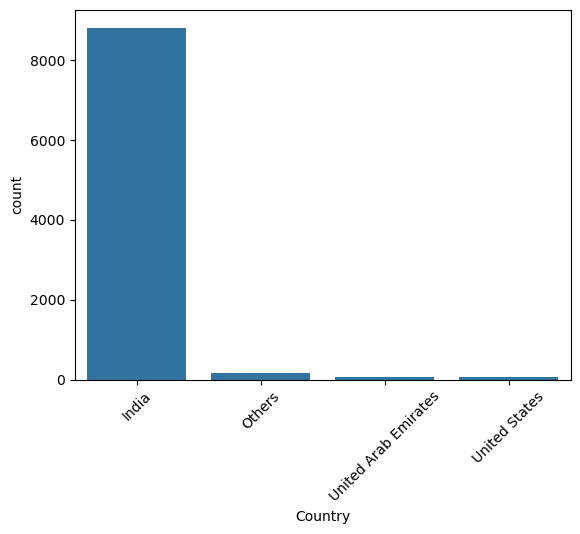

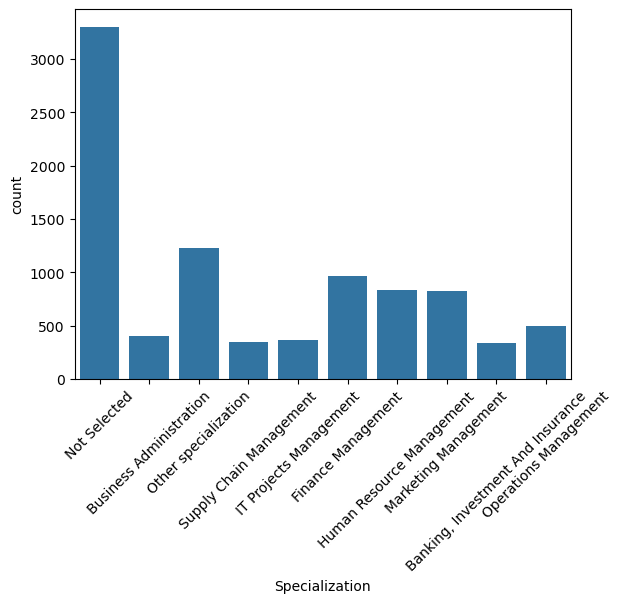

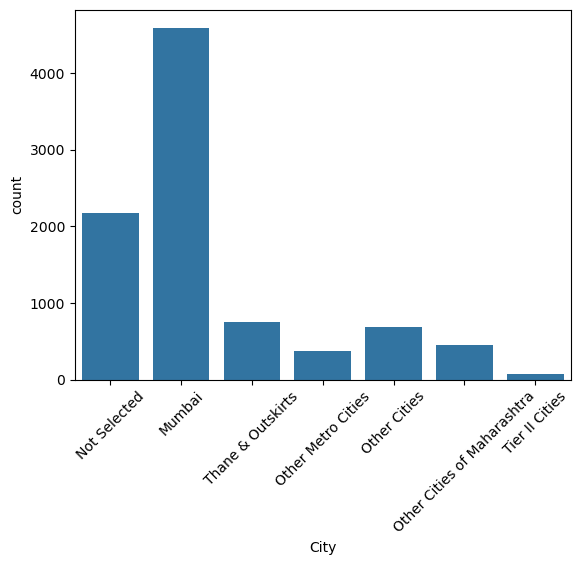

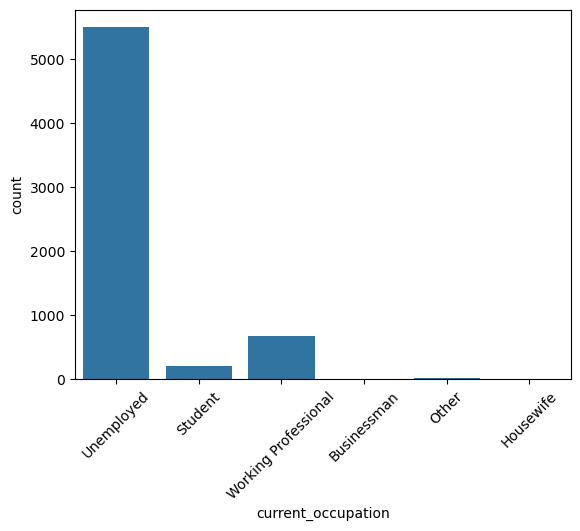

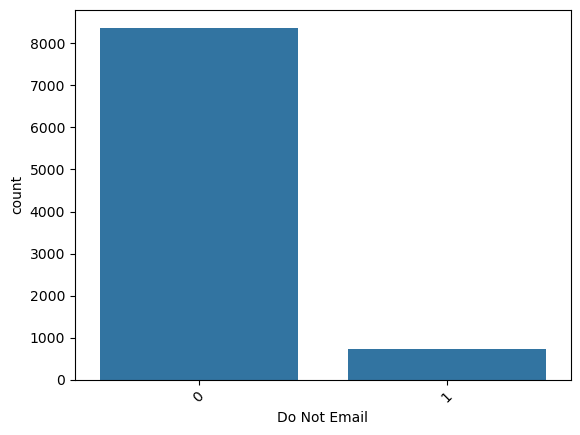

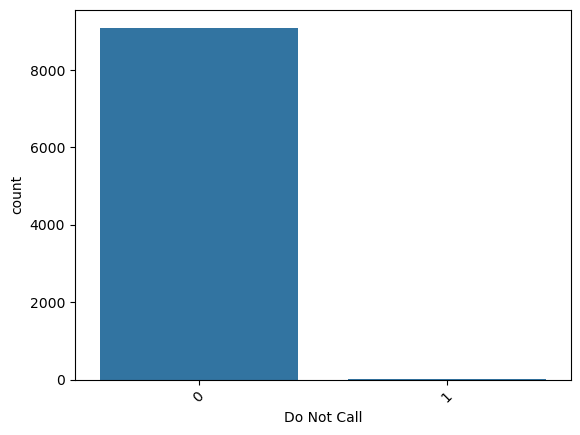

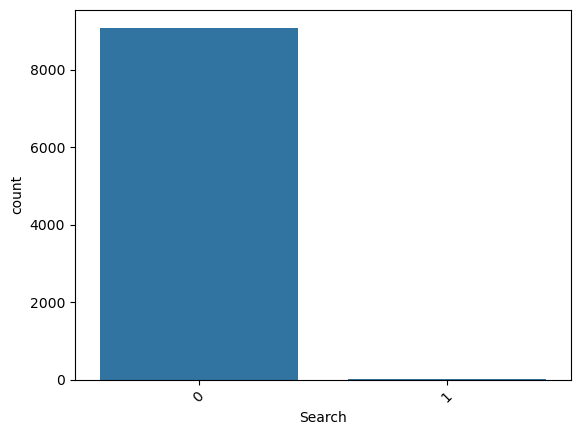

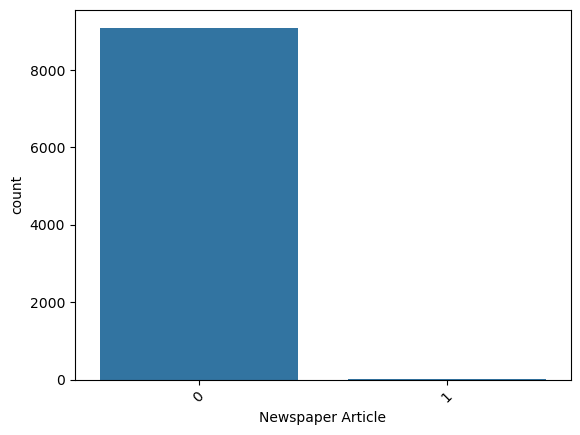

KeyError: 'X Education Forums'

In [1396]:
# Univariate Analysis
for i in cat_cols:
    sns.countplot(x=lead_data[i])
    plt.xticks(rotation=45)
    plt.show()
for i in num_cols:
    sns.histplot(x=lead_data[i])
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Bivariate Analysis
#sns.pairplot(df[num_cols])
#plt.show()
for i in num_cols:
    sns.scatterplot(x=lead_data[i],y=lead_data["Converted"])
    plt.show()

In [ ]:
#Bivariate categorical
for i in cat_cols:
    sns.barplot(x=lead_data[i],y=lead_data["Converted"])
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
  # Assuming 'num_cols' is your list of numerical columns
sns.pairplot(lead_data[num_cols])

In [1401]:
num_cols1=["Do Not Email","Do Not Call","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Search","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]

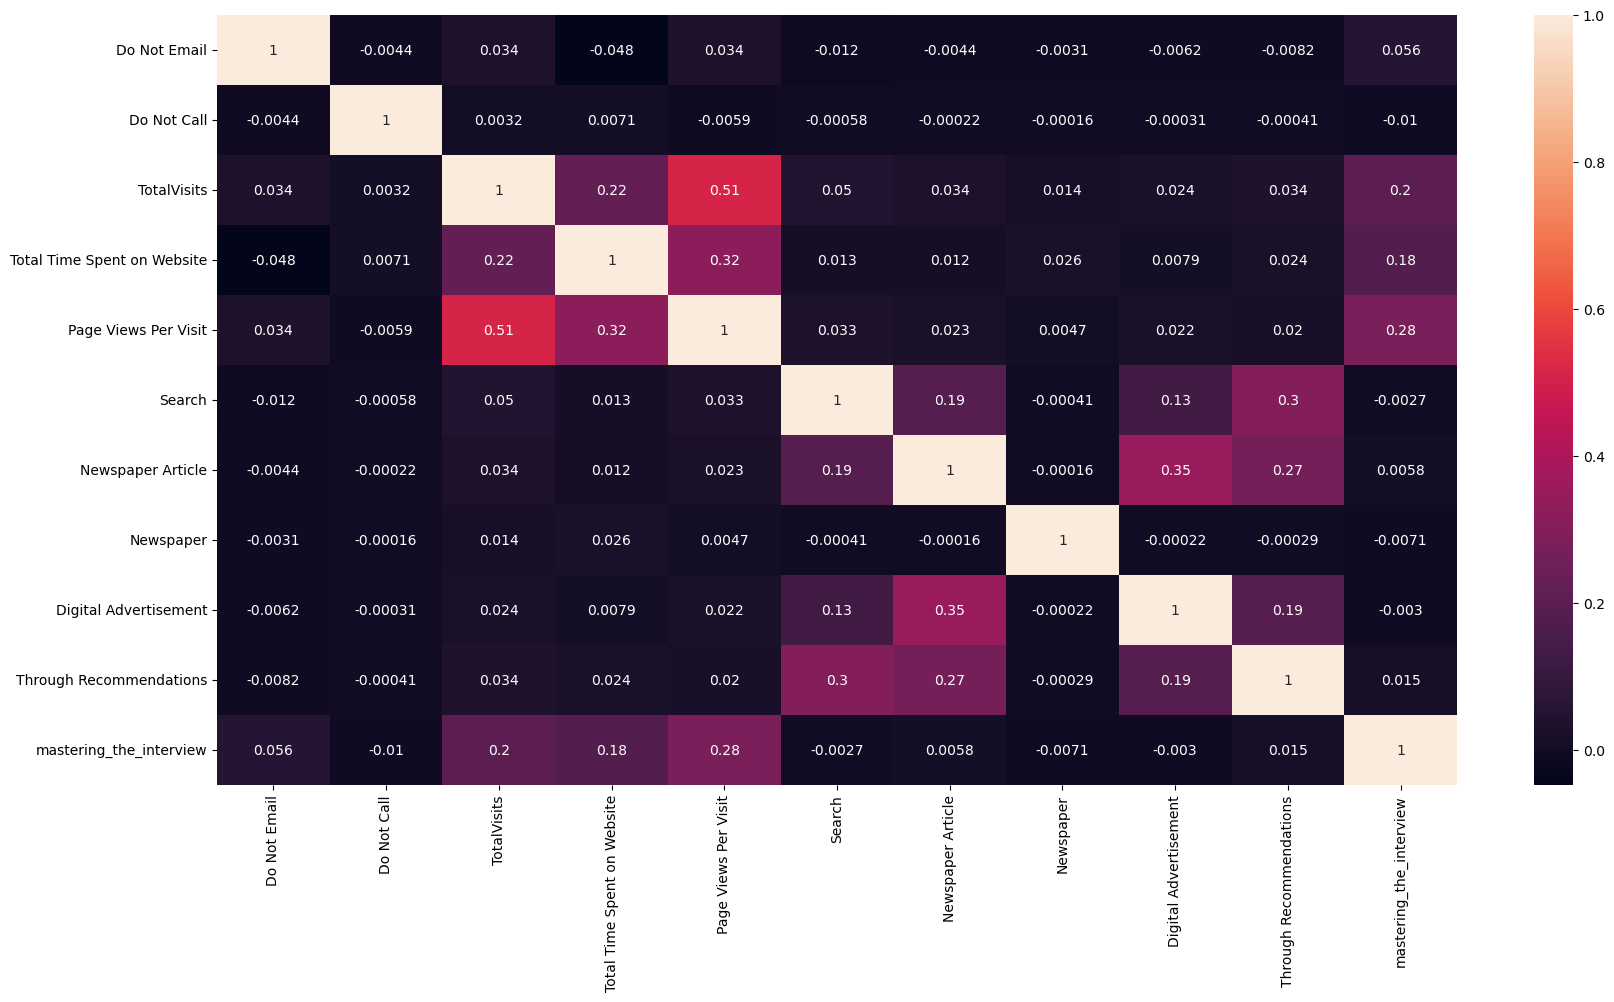

In [1403]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data[num_cols1].corr(),annot = True)
plt.show()

## Outllier Handling

In [1406]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols1_check=lead_data[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]

In [1408]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols1_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000
99%,17.000000,1838.960000,9.000000


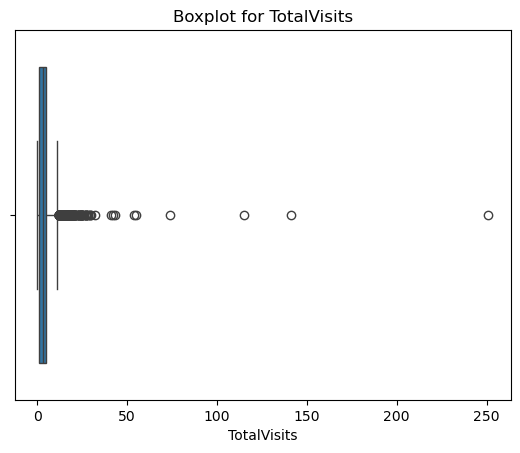

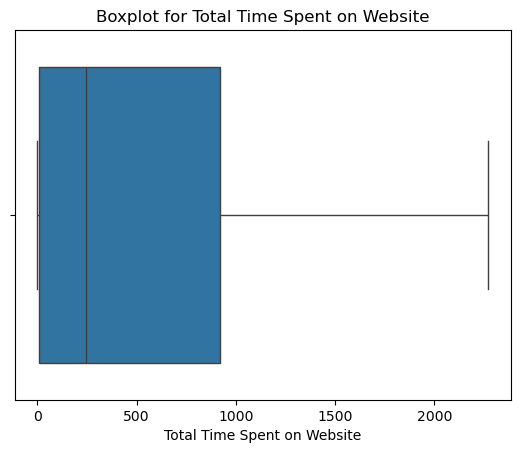

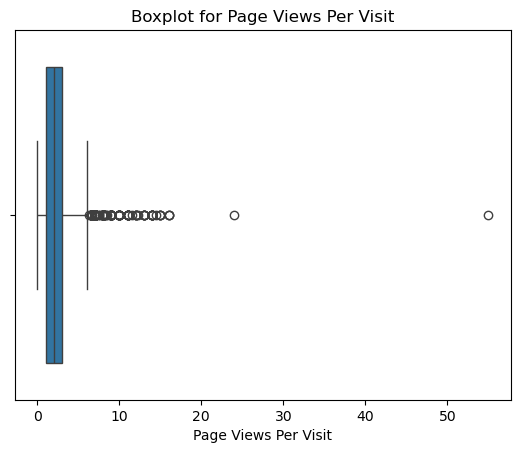

In [1410]:
for i in num_cols:
    sns.boxplot(x=lead_data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [1412]:
#TotalVisits has significant outlier. Dropping all the values >17
lead_data= lead_data[~(lead_data['TotalVisits'] > 17)]

In [1414]:
#Total Time Spent on Website also has significant outlier. Dropping all the values >1838
lead_data= lead_data[~(lead_data['Total Time Spent on Website'] > 1838)]

In [1416]:
#Page Views Per Visit also has significant outlier. Dropping all the values >9
lead_data= lead_data[~(lead_data['Page Views Per Visit'] > 9)]

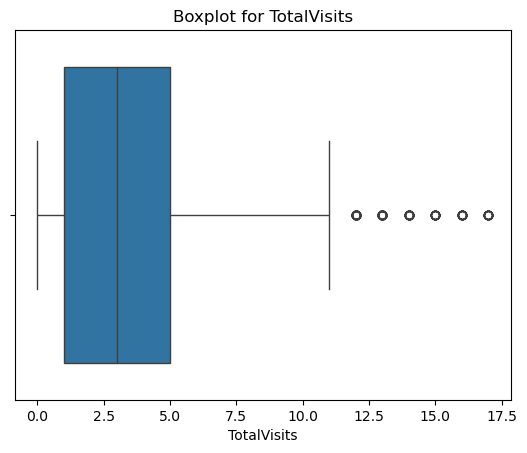

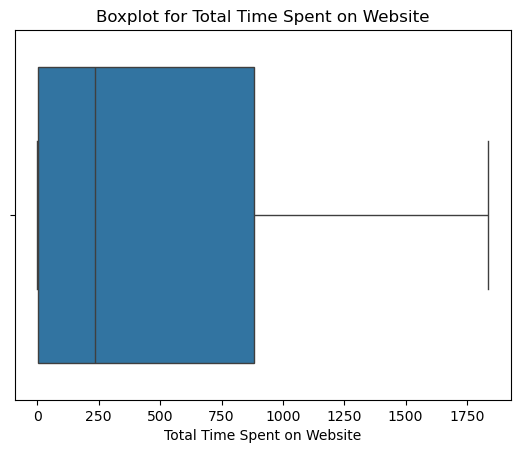

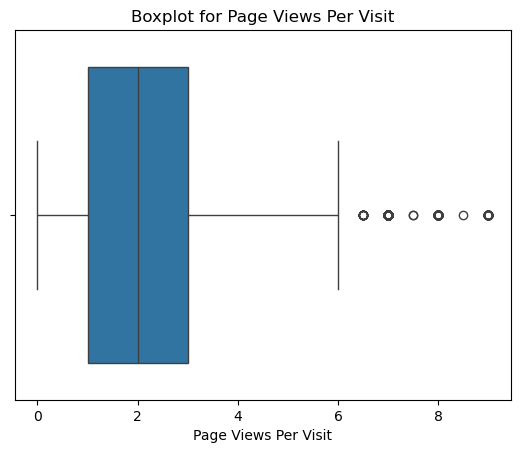

In [1418]:
for i in num_cols:
    sns.boxplot(x=lead_data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [1421]:
#inference from EDA

## Test-Train Split

In [1424]:
from sklearn.model_selection import train_test_split

In [1426]:
cat_cols=["Lead Origin","Lead Source","Last Activity","Country","Specialization","City","current_occupation"]

In [1428]:
# Number of dummies = n-1
lead_data1=pd.get_dummies(lead_data,columns=["Lead Origin","Lead Source","Last Activity"],drop_first=True,dtype=int)

In [1430]:
lead_data1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,current_occupation,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,City,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,India,Not Selected,Unemployed,0,0,0,0,0,Not Selected,0,0,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Not Selected,Unemployed,0,0,0,0,0,Not Selected,0,0,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,Student,0,0,0,0,0,Mumbai,1,1,0,0,0,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Other specialization,Unemployed,0,0,0,0,0,Mumbai,0,1,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Not Selected,Unemployed,0,0,0,0,0,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0


## Creation of dummy variables for categorical variables

In [1433]:

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["current_occupation"], prefix="current_occupation",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["current_occupation_Other"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)


In [1435]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["Country"], prefix="Country",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["Country_Others"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)

In [1437]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["Specialization"], prefix="Specialization",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["Specialization_Not Selected"], axis=1)
#ml1 = ml.drop(["Specialization_Other specialization"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)

In [1439]:
lead_data1=pd.get_dummies(lead_data1,columns=["City"],drop_first=True,dtype=int)

In [1441]:
col=['current_occupation','Country','Specialization']
# Check if each column exists and drop it if it does
for column in col:
    if column in lead_data1.columns:
        lead_data1.drop(column, axis=1, inplace=True)

In [1443]:
#lead_data1 = lead_data1.drop(["current_occupation","Country","Specialization"], axis=1)

In [1445]:
# Putting feature variable to X
X = lead_data1.drop(['Prospect ID','Lead Number','Converted'], axis=1)


In [1447]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8863 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8863 non-null   int64  
 1   Do Not Call                               8863 non-null   int64  
 2   TotalVisits                               8863 non-null   float64
 3   Total Time Spent on Website               8863 non-null   int64  
 4   Page Views Per Visit                      8863 non-null   float64
 5   Search                                    8863 non-null   int64  
 6   Newspaper Article                         8863 non-null   int64  
 7   Newspaper                                 8863 non-null   int64  
 8   Digital Advertisement                     8863 non-null   int64  
 9   Through Recommendations                   8863 non-null   int64  
 10  mastering_the_interview                  

In [1449]:
# Putting response variable to y
y = lead_data1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1451]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1453]:
from sklearn.preprocessing import StandardScaler

In [1455]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5428,0,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,0.641520,2.066787,0.128349,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4637,0,0,-0.386282,-0.740141,-0.134151,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4468,0,0,-0.043681,-0.205124,0.390849,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2058,0,0,1.326721,-0.583457,-0.449151,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1457]:
### Checking the lead conversion rate
conversion= (sum(lead_data1['Converted'])/len(lead_data1['Converted'].index))*100
conversion

37.62834254767009

We have almost 38% lead conversion rate

### Step 6: Looking at Correlations

In [1461]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8863 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8863 non-null   int64  
 1   Do Not Call                               8863 non-null   int64  
 2   TotalVisits                               8863 non-null   float64
 3   Total Time Spent on Website               8863 non-null   int64  
 4   Page Views Per Visit                      8863 non-null   float64
 5   Search                                    8863 non-null   int64  
 6   Newspaper Article                         8863 non-null   int64  
 7   Newspaper                                 8863 non-null   int64  
 8   Digital Advertisement                     8863 non-null   int64  
 9   Through Recommendations                   8863 non-null   int64  
 10  mastering_the_interview                  

In [1463]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

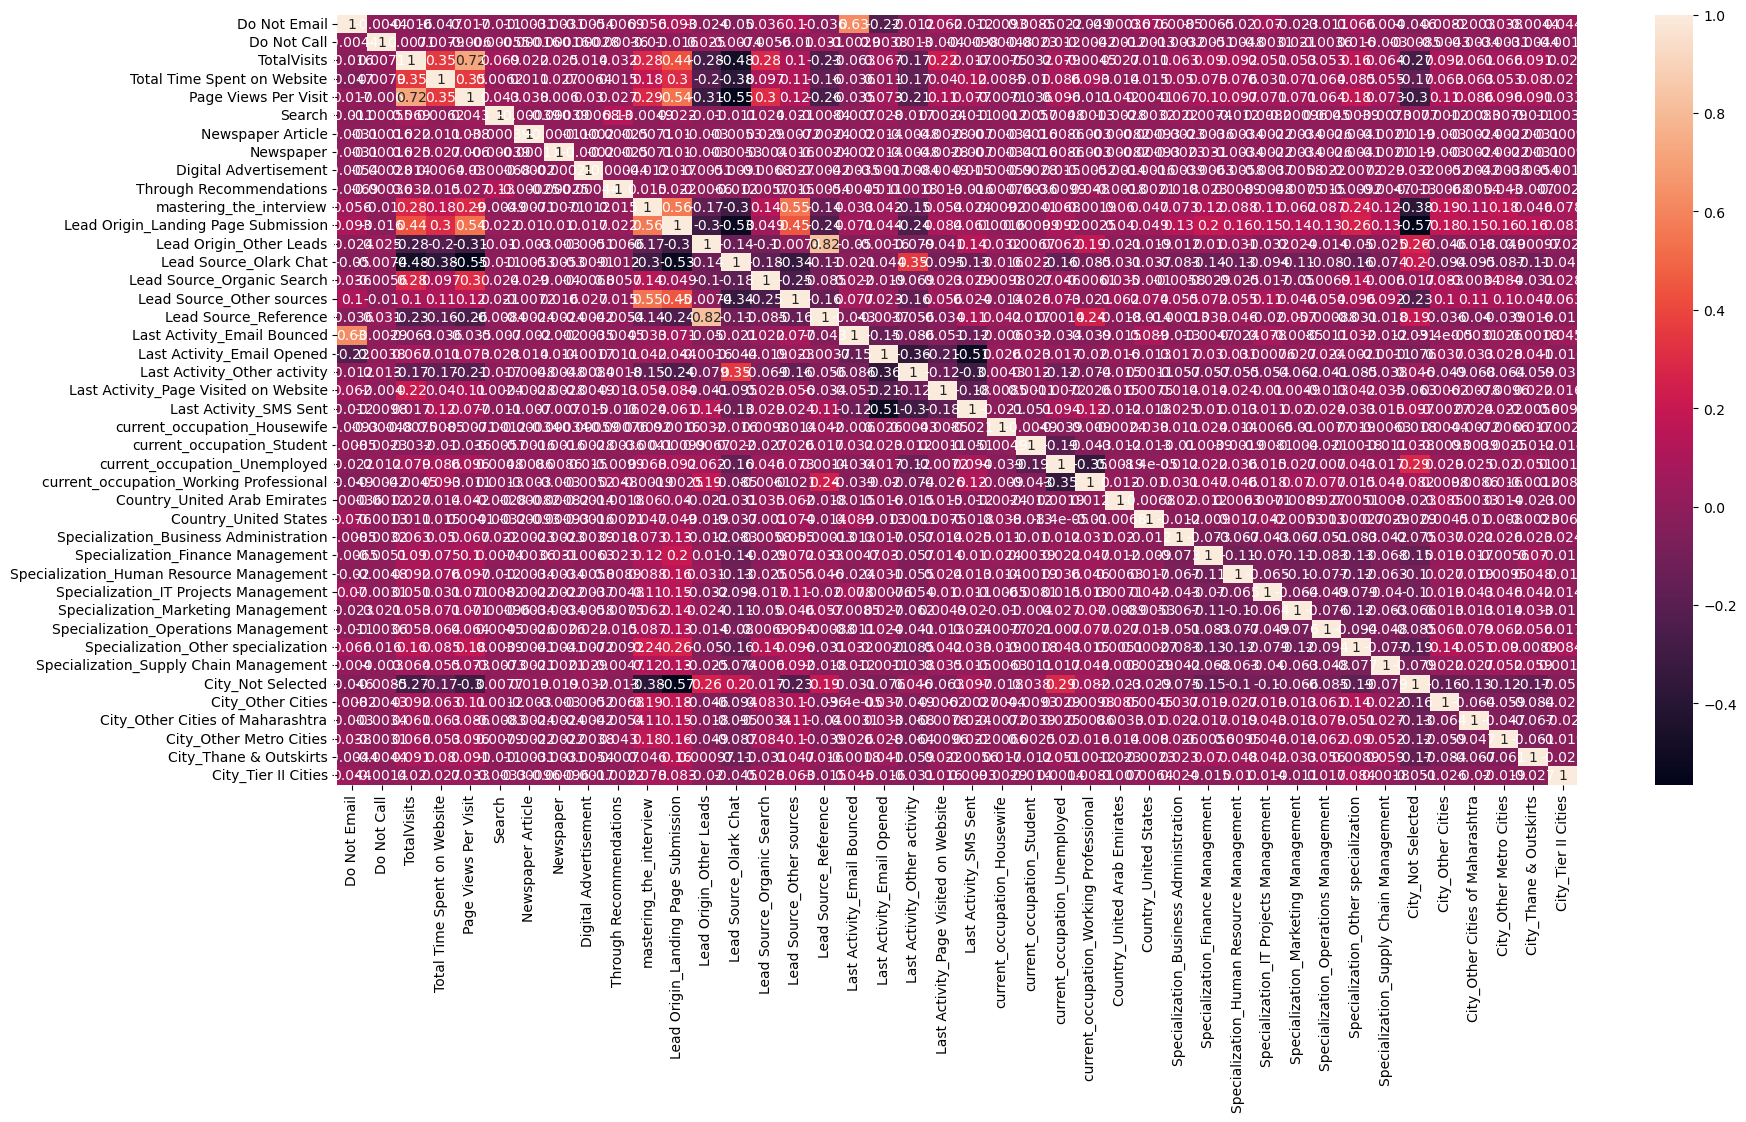

In [1465]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [1467]:
import statsmodels.api as sm

In [1468]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6204 entries, 5428 to 5881
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6204 non-null   int64  
 1   Do Not Call                               6204 non-null   int64  
 2   TotalVisits                               6204 non-null   float64
 3   Total Time Spent on Website               6204 non-null   float64
 4   Page Views Per Visit                      6204 non-null   float64
 5   Search                                    6204 non-null   int64  
 6   Newspaper Article                         6204 non-null   int64  
 7   Newspaper                                 6204 non-null   int64  
 8   Digital Advertisement                     6204 non-null   int64  
 9   Through Recommendations                   6204 non-null   int64  
 10  mastering_the_interview               

In [1469]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6162
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 15 Mar 2025   Deviance:                   1.5630e+05
Time:                        08:32:05   Pearson chi2:                 7.64e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     9.239e+13   4.64e+06   1.99e+07      0.000    9.24e+13    9.24e+13
Do Not Email                             -4.888e+13   4.22e+06  -1.16e+07      0.000   -4.89e+13   -4.89e+13
Do Not Call                               4.314e+15   6.73e+07   6.41e+07      0.000    4.31e+15    4.31e+15
TotalVisits                               -1.01e+13   1.32e+06  -7.64e+06      0.000   -1.01e+13   -1.01e+13
Total Time Spent on Website               3.169e+14   9.98e+05   3.18e+08      0.000    3.17e+14    3.17e+14
Page Views Per Visit                     -1.461e+13   1.46e+06     -1e+07      0.000   -1.46e+13   -1.46e+13
Search                                   -8.987e+14   2.18e+07  -4.13e+07      0.000   -8.99e+14   -8.99e+14
Newspaper Article                          5.79e+15   6.73e+07    8.6e+07      0.000    5.79e+15    5.79e+15
Newspaper                                   12.0290   9.95e-07   1.21e+07      0.000      12.029      12.029
Digital Advertisement                     1.362e+15    3.9e+07   3.49e+07      0.000    1.36e+15    1.36e+15
Through Recommendations                   9.904e+14   3.96e+07    2.5e+07      0.000     9.9e+14     9.9e+14
mastering_the_interview                   1.103e+14   2.72e+06   4.05e+07      0.000     1.1e+14     1.1e+14
Lead Origin_Landing Page Submission      -5.832e+14   3.35e+06  -1.74e+08      0.000   -5.83e+14   -5.83e+14
Lead Origin_Other Leads                   1.457e+15   6.66e+06   2.19e+08      0.000    1.46e+15    1.46e+15
Lead Source_Olark Chat                   -3.271e+14   3.54e+06  -9.25e+07      0.000   -3.27e+14   -3.27e+14
Lead Source_Organic Search                2.107e+13   3.18e+06   6.62e+06      0.000    2.11e+13    2.11e+13
Lead Source_Other sources                 3.503e+13    2.8e+06   1.25e+07      0.000     3.5e+13     3.5e+13
Lead Source_Reference                    -3.882e+14   7.54e+06  -5.15e+07      0.000   -3.88e+14   -3.88e+14
Last Activity_Email Bounced              -4.664e+14   7.35e+06  -6.35e+07      0.000   -4.66e+14   -4.66e+14
Last Activity_Email Opened               -2.321e+14   4.33e+06  -5.36e+07      0.000   -2.32e+14   -2.32e+14
Last Activity_Other activity             -3.523e+14   4.71e+06  -7.48e+07      0.000   -3.52e+14   -3.52e+14
Last Activity_Page Visited on Website    -2.447e+14   5.35e+06  -4.58e+07      0.000   -2.45e+14   -2.45e+14
Last Activity_SMS Sent                   -1.682e+14   4.42e+06  -3.81e+07      0.000   -1.68e+14   -1.68e+14
current_occupation_Housewife              4.686e+15   2.76e+07    1.7e+08      0.000    4.69e+15    4.69e+15
current_occupation_Student                1.818e+14   6.09e+06   2.99e+07      0.000    1.82e+14    1.82e+14
current_occupation_Unemployed  

### Step 8: Feature Selection Using RFE

In [1471]:
print(pd.reset_option('display.max_columns',100))


None


In [1475]:
print(pd.set_option('display.max_columns',100))

None


In [1478]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5428,0,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,0.641520,2.066787,0.128349,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4637,0,0,-0.386282,-0.740141,-0.134151,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4468,0,0,-0.043681,-0.205124,0.390849,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2058,0,0,1.326721,-0.583457,-0.449151,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1481]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1483]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)

In [1485]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False])

In [1487]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Search', False, 11),
 ('Newspaper Article', True, 1),
 ('Newspaper', False, 26),
 ('Digital Advertisement', False, 14),
 ('Through Recommendations', False, 12),
 ('mastering_the_interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other Leads', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other sources', False, 15),
 ('Lead Source_Reference', False, 24),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Other activity', False, 20),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_SMS Sent', True, 1),
 ('current_occupation_Housewife', True, 1),
 ('current_occupation_Student', True, 1),
 ('current_occupation_Unemployed', True, 1),
 ('current_occupati

In [1489]:
col = X_train.columns[rfe.support_]

In [1491]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'mastering_the_interview', 'Lead Source_Organic Search',
       'Lead Source_Other sources', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Other activity',
       'Last Activity_Page Visited on Website', 'Country_United Arab Emirates',
       'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Operations Management',
       'Specialization_Other specialization',
       'Specialization_Supply Chain Management', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

##### Assessing the model with StatsModels

In [1494]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5428,0,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,0.641520,2.066787,0.128349,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4637,0,0,-0.386282,-0.740141,-0.134151,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4468,0,0,-0.043681,-0.205124,0.390849,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2058,0,0,1.326721,-0.583457,-0.449151,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1496]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6204 entries, 5428 to 5881
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6204 non-null   int64  
 1   Do Not Call                               6204 non-null   int64  
 2   TotalVisits                               6204 non-null   float64
 3   Total Time Spent on Website               6204 non-null   float64
 4   Page Views Per Visit                      6204 non-null   float64
 5   Search                                    6204 non-null   int64  
 6   Newspaper Article                         6204 non-null   int64  
 7   Newspaper                                 6204 non-null   int64  
 8   Digital Advertisement                     6204 non-null   int64  
 9   Through Recommendations                   6204 non-null   int64  
 10  mastering_the_interview               

In [1498]:
X_train_sm = sm.add_constant(X_train[col])


In [1500]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6186
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.8
Date:                Sat, 15 Mar 2025   Deviance:                       5067.7
Time:                        08:32:12   Pearson chi2:                 6.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8745      0.129    -22.254      0.000      -3.128      -2.621
Do Not Email                                -0.9605      0.177     -5.424      0.000      -1.308      -0.613
Total Time Spent on Website                  1.1022      0.041     26.694      0.000       1.021       1.183
Newspaper Article                           23.0212   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Origin_Landing Page Submission         -0.6006      0.117     -5.116      0.000      -0.831      -0.371
Lead Origin_Other Leads                      3.2848      0.194     16.962      0.000       2.905       3.664
Lead Source_Olark Chat                       1.1350      0.122      9.312      0.000       0.896       1.374
Last Activity_Email Opened                   0.8812      0.095      9.319      0.000       0.696       1.067
Last Activity_SMS Sent                       2.0364      0.098     20.785      0.000       1.844       2.228
current_occupation_Housewife                24.5973   1.72e+04      0.001      0.999   -3.37e+04    3.38e+04
current_occupation_Student                   1.2514      0.247      5.059      0.000       0.767       1.736
current_occupation_Unemployed                1.4528      0.102     14.268      0.000       1.253       1.652
current_occupation_Working Professional      4.0542      0.216     18.764      0.000       3.631       4.478
Country_United States                       -0.9227      0.468     -1.973      0.049      -1.839      -0.006
Specialization_Business Administration       0.2536      0.176      1.438      0.150      -0.092       0.599
Specialization_Human Resource Management     0.1575      0.126      1.251      0.211      -0.089       0.404
Specialization_Marketing Management          0.1846      0.124      1.492      0.136      -0.058       0.427
City_Not Selected                           -0.4695      0.118     -3.983      0.000      -0.701      -0.238
============================================================================================================
"""

In [1502]:
#calculatin the VIF of model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,9.933336
1,Do Not Email,1.114049
2,Total Time Spent on Website,1.345706
3,Newspaper Article,1.002288
4,Lead Origin_Landing Page Submission,2.621411
5,Lead Origin_Other Leads,1.488058
6,Lead Source_Olark Chat,1.848298
7,Last Activity_Email Opened,1.501987
8,Last Activity_SMS Sent,1.526754
9,current_occupation_Housewife,1.006658


In [1504]:
#drpping 
X_train_sm=X_train_sm.drop("current_occupation_Housewife",axis=1)

In [1506]:
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6187
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.3
Date:                Sat, 15 Mar 2025   Deviance:                       5090.6
Time:                        08:32:16   Pearson chi2:                 6.35e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8487      0.128    -22.190      0.000      -3.100      -2.597
Do Not Email                                -0.9670      0.177     -5.467      0.000      -1.314      -0.620
Total Time Spent on Website                  1.0989      0.041     26.693      0.000       1.018       1.180
Newspaper Article                           21.0047   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Origin_Landing Page Submission         -0.5821      0.117     -4.977      0.000      -0.811      -0.353
Lead Origin_Other Leads                      3.3161      0.194     17.109      0.000       2.936       3.696
Lead Source_Olark Chat                       1.1276      0.122      9.273      0.000       0.889       1.366
Last Activity_Email Opened                   0.8791      0.094      9.331      0.000       0.694       1.064
Last Activity_SMS Sent                       2.0237      0.098     20.723      0.000       1.832       2.215
current_occupation_Student                   1.2142      0.247      4.918      0.000       0.730       1.698
current_occupation_Unemployed                1.4152      0.101     14.020      0.000       1.217       1.613
current_occupation_Working Professional      4.0146      0.216     18.627      0.000       3.592       4.437
Country_United States                       -0.9200      0.467     -1.971      0.049      -1.835      -0.005
Specialization_Business Administration       0.2743      0.175      1.563      0.118      -0.070       0.618
Specialization_Human Resource Management     0.1702      0.125      1.357      0.175      -0.076       0.416
Specialization_Marketing Management          0.1802      0.124      1.459      0.145      -0.062       0.422
City_Not Selected                           -0.4542      0.118     -3.862      0.000      -0.685      -0.224
============================================================================================================
"""

In [1508]:
#drpping 
X_train_sm=X_train_sm.drop("Newspaper Article",axis=1)

In [1510]:
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.2
Date:                Sat, 15 Mar 2025   Deviance:                       5092.5
Time:                        08:32:17   Pearson chi2:                 6.35e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8521      0.128    -22.215      0.000      -3.104      -2.601
Do Not Email                                -0.9672      0.177     -5.469      0.000      -1.314      -0.621
Total Time Spent on Website                  1.0995      0.041     26.709      0.000       1.019       1.180
Lead Origin_Landing Page Submission         -0.5758      0.117     -4.929      0.000      -0.805      -0.347
Lead Origin_Other Leads                      3.3168      0.194     17.114      0.000       2.937       3.697
Lead Source_Olark Chat                       1.1284      0.122      9.280      0.000       0.890       1.367
Last Activity_Email Opened                   0.8809      0.094      9.351      0.000       0.696       1.066
Last Activity_SMS Sent                       2.0232      0.098     20.718      0.000       1.832       2.215
current_occupation_Student                   1.2106      0.247      4.904      0.000       0.727       1.694
current_occupation_Unemployed                1.4130      0.101     14.005      0.000       1.215       1.611
current_occupation_Working Professional      4.0115      0.216     18.615      0.000       3.589       4.434
Country_United States                       -0.9204      0.467     -1.972      0.049      -1.835      -0.006
Specialization_Business Administration       0.2729      0.175      1.555      0.120      -0.071       0.617
Specialization_Human Resource Management     0.1688      0.125      1.347      0.178      -0.077       0.415
Specialization_Marketing Management          0.1789      0.124      1.448      0.148      -0.063       0.421
City_Not Selected                           -0.4465      0.117     -3.803      0.000      -0.677      -0.216
============================================================================================================
"""

In [1512]:
#calculatin the VIF of model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,9.924116
1,Do Not Email,1.113900
2,Total Time Spent on Website,1.345304
3,Lead Origin_Landing Page Submission,2.617822
4,Lead Origin_Other Leads,1.485262
5,Lead Source_Olark Chat,1.848157
6,Last Activity_Email Opened,1.501756
7,Last Activity_SMS Sent,1.526303
8,current_occupation_Student,1.093131
9,current_occupation_Unemployed,1.709383


In [1514]:
#drpping 
X_train_sm=X_train_sm.drop("Specialization_Human Resource Management",axis=1)

In [1516]:
logm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.1
Date:                Sat, 15 Mar 2025   Deviance:                       5094.3
Time:                        08:32:18   Pearson chi2:                 6.31e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3923
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8447      0.128    -22.190      0.000      -3.096      -2.593
Do Not Email                               -0.9722      0.177     -5.500      0.000      -1.319      -0.626
Total Time Spent on Website                 1.1016      0.041     26.762      0.000       1.021       1.182
Lead Origin_Landing Page Submission        -0.5589      0.116     -4.813      0.000      -0.786      -0.331
Lead Origin_Other Leads                     3.3288      0.194     17.193      0.000       2.949       3.708
Lead Source_Olark Chat                      1.1293      0.122      9.292      0.000       0.891       1.367
Last Activity_Email Opened                  0.8820      0.094      9.363      0.000       0.697       1.067
Last Activity_SMS Sent                      2.0213      0.098     20.701      0.000       1.830       2.213
current_occupation_Student                  1.2138      0.247      4.916      0.000       0.730       1.698
current_occupation_Unemployed               1.4195      0.101     14.082      0.000       1.222       1.617
current_occupation_Working Professional     4.0177      0.215     18.659      0.000       3.596       4.440
Country_United States                      -0.9180      0.467     -1.965      0.049      -1.834      -0.002
Specialization_Business Administration      0.2461      0.174      1.412      0.158      -0.096       0.588
Specialization_Marketing Management         0.1528      0.122      1.253      0.210      -0.086       0.392
City_Not Selected                          -0.4572      0.117     -3.903      0.000      -0.687      -0.228
===========================================================================================================
"""

In [1518]:
#calculatin the VIF of model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,9.899105
1,Do Not Email,1.112376
2,Total Time Spent on Website,1.343878
3,Lead Origin_Landing Page Submission,2.586895
4,Lead Origin_Other Leads,1.475620
5,Lead Source_Olark Chat,1.848103
6,Last Activity_Email Opened,1.501746
7,Last Activity_SMS Sent,1.525988
8,current_occupation_Student,1.093020
9,current_occupation_Unemployed,1.705117


In [1520]:
#drpping 
X_train_sm=X_train_sm.drop("Specialization_Marketing Management",axis=1)

In [1522]:
logm6= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.9
Date:                Sat, 15 Mar 2025   Deviance:                       5095.9
Time:                        08:32:19   Pearson chi2:                 6.31e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8375      0.128    -22.177      0.000      -3.088      -2.587
Do Not Email                               -0.9738      0.177     -5.510      0.000      -1.320      -0.627
Total Time Spent on Website                 1.1022      0.041     26.778      0.000       1.021       1.183
Lead Origin_Landing Page Submission        -0.5468      0.116     -4.728      0.000      -0.773      -0.320
Lead Origin_Other Leads                     3.3339      0.194     17.226      0.000       2.955       3.713
Lead Source_Olark Chat                      1.1285      0.121      9.291      0.000       0.890       1.367
Last Activity_Email Opened                  0.8812      0.094      9.358      0.000       0.697       1.066
Last Activity_SMS Sent                      2.0185      0.098     20.686      0.000       1.827       2.210
current_occupation_Student                  1.2136      0.247      4.915      0.000       0.730       1.698
current_occupation_Unemployed               1.4253      0.101     14.147      0.000       1.228       1.623
current_occupation_Working Professional     4.0277      0.215     18.710      0.000       3.606       4.450
Country_United States                      -0.9340      0.467     -1.999      0.046      -1.850      -0.018
Specialization_Business Administration      0.2254      0.174      1.299      0.194      -0.115       0.565
City_Not Selected                          -0.4628      0.117     -3.954      0.000      -0.692      -0.233
===========================================================================================================
"""

In [1524]:
X_train_sm=X_train_sm.drop("Specialization_Business Administration",axis=1)	

In [1526]:
logm7= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.8
Date:                Sat, 15 Mar 2025   Deviance:                       5097.5
Time:                        08:32:20   Pearson chi2:                 6.33e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.8369      0.128    -22.174      0.000      -3.088      -2.586
Do Not Email                               -0.9709      0.177     -5.497      0.000      -1.317      -0.625
Total Time Spent on Website                 1.1021      0.041     26.778      0.000       1.021       1.183
Lead Origin_Landing Page Submission        -0.5374      0.115     -4.656      0.000      -0.764      -0.311
Lead Origin_Other Leads                     3.3354      0.194     17.235      0.000       2.956       3.715
Lead Source_Olark Chat                      1.1295      0.121      9.302      0.000       0.891       1.367
Last Activity_Email Opened                  0.8827      0.094      9.377      0.000       0.698       1.067
Last Activity_SMS Sent                      2.0201      0.098     20.709      0.000       1.829       2.211
current_occupation_Student                  1.2115      0.247      4.908      0.000       0.728       1.695
current_occupation_Unemployed               1.4302      0.101     14.196      0.000       1.233       1.628
current_occupation_Working Professional     4.0310      0.215     18.730      0.000       3.609       4.453
Country_United States                      -0.9459      0.467     -2.025      0.043      -1.861      -0.031
City_Not Selected                          -0.4672      0.117     -3.993      0.000      -0.697      -0.238
===========================================================================================================
"""

In [1528]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5428    0.143607
8583    0.771424
4637    0.059537
4468    0.061941
2058    0.041703
1720    0.516234
2287    0.064865
1434    0.211687
5553    0.686107
8330    0.933652
dtype: float64

In [1530]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14360749, 0.77142442, 0.05953722, 0.0619412 , 0.04170345,
       0.51623394, 0.06486502, 0.21168686, 0.68610698, 0.93365176])

In [1532]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID
0,0,0.143607,5428
1,1,0.771424,8583
2,0,0.059537,4637
3,0,0.061941,4468
4,0,0.041703,2058


In [1534]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted
0,0,0.143607,5428,0
1,1,0.771424,8583,1
2,0,0.059537,4637,0
3,0,0.061941,4468,0
4,0,0.041703,2058,0


In [1536]:
from sklearn import metrics

In [1538]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3482  419]
 [ 727 1576]]


In [1540]:
# Predicted     not_converted    converted
# Actual
# not_converted        3270      365
# converted            579       708  

In [1542]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1544]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.89
3,Lead Origin_Landing Page Submission,2.54
12,City_Not Selected,2.03
5,Lead Source_Olark Chat,1.85
9,current_occupation_Unemployed,1.70
7,Last Activity_SMS Sent,1.53
6,Last Activity_Email Opened,1.50
4,Lead Origin_Other Leads,1.47
10,current_occupation_Working Professional,1.41
2,Total Time Spent on Website,1.34


In [1546]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1548]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',TP / float(TP+FN))
# Let us calculate specificity
print('specificity:  ',TN / float(TN+FP)) 
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',FP/ float(TN+FP))
# positive predictive value 
print ('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value: ',TN / float(TN+ FN))

0.8152804642166345
Sensitivity:  0.6843247937472862
specificity:   0.8925916431684183
False Positive Rate:  0.10740835683158165
positive predictive value:  0.7899749373433584
Negative predictive value:  0.8272748871465906


In [1550]:
### Step 9: Plotting the ROC Curve

In [1552]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1554]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

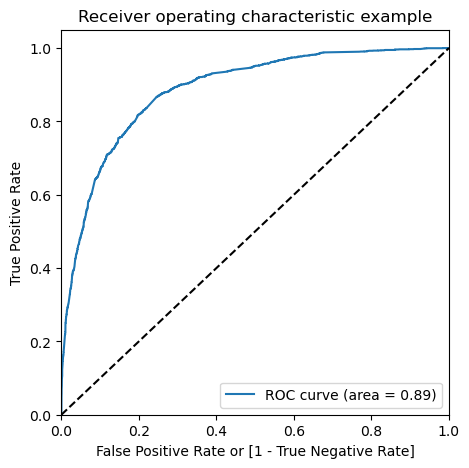

In [1556]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [1559]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.143607,5428,0,1,1,0,0,0,0,0,0,0,0
1,1,0.771424,8583,1,1,1,1,1,1,1,1,1,0,0
2,0,0.059537,4637,0,1,0,0,0,0,0,0,0,0,0
3,0,0.061941,4468,0,1,0,0,0,0,0,0,0,0,0
4,0,0.041703,2058,0,1,0,0,0,0,0,0,0,0,0


In [1561]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371212  1.000000  0.000000
0.1   0.1  0.618794  0.972644  0.409895
0.2   0.2  0.757253  0.904038  0.670597
0.3   0.3  0.795293  0.867564  0.752628
0.4   0.4  0.812701  0.757707  0.845168
0.5   0.5  0.815280  0.684325  0.892592
0.6   0.6  0.801580  0.590968  0.925916
0.7   0.7  0.782076  0.505862  0.945142
0.8   0.8  0.757253  0.402084  0.966932
0.9   0.9  0.718407  0.261832  0.987952


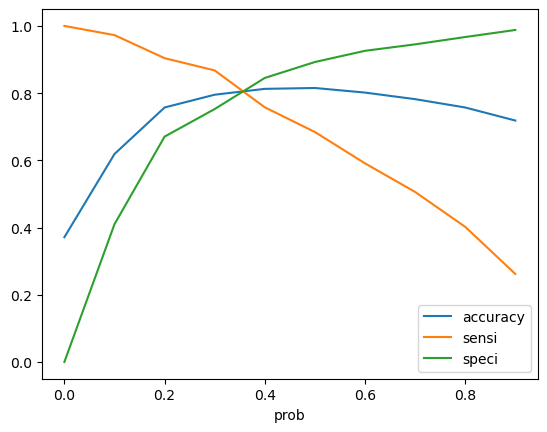

In [1563]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1565]:
# Creating different label columns using different probability cutoffs

num= [float(x) for x in (0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4)]
for i in num:
    y_train_pred_final[i]=  y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
0,0,0.143607,5428,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.771424,8583,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1
2,0,0.059537,4637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.061941,4468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.041703,2058,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1567]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.converted, y_pred= y_train_pred_final[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.30,0.30,0.795293,0.867564,0.752628
0.31,0.31,0.801902,0.834564,0.782620
0.32,0.32,0.804481,0.829353,0.789797
0.33,0.33,0.804965,0.822406,0.794668
0.34,0.34,0.808188,0.816327,0.803384
0.35,0.35,0.807866,0.797221,0.814150
0.36,0.36,0.809800,0.790708,0.821072
0.37,0.37,0.810445,0.782458,0.826967
0.38,0.38,0.811090,0.773773,0.833120
0.39,0.39,0.811412,0.765089,0.838759


In [1569]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted
0,0,0.143607,5428,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.771424,8583,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.059537,4637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.061941,4468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.041703,2058,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1571]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8049645390070922

In [1573]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3100,  801],
       [ 409, 1894]], dtype=int64)

In [1575]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1577]:
print(TP / float(TP+FN))
# Let us calculate specificity
TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# Positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

0.822405557967868
0.20533196616252242
0.7027829313543599
0.8834425762325449


In [1053]:
## Precision and Recall

In [1579]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3482,  419],
       [ 727, 1576]], dtype=int64)

##### Precision
TP / TP + FP

In [1590]:
print('precicsion: ',confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print('Recall: ',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

precicsion:  0.7899749373433584
Recall:  0.6843247937472862


##### Recall
TP / TP + FN

In [1592]:
from sklearn.metrics import precision_score, recall_score

In [1594]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [1596]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7899749373433584

In [1598]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.6843247937472862

### Precision and recall tradeoff

In [1601]:
from sklearn.metrics import precision_recall_curve

In [1603]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    1
 6201    1
 6202    1
 6203    0
 Name: converted, Length: 6204, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    0
 6202    1
 6203    0
 Name: predicted, Length: 6204, dtype: int64)

In [1605]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

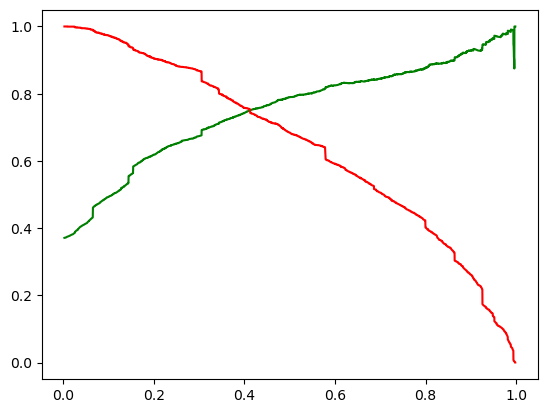

In [1607]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Create Lead score on train dataset

In [1673]:
y_train_pred_final.shape

(6204, 24)

In [1679]:
X_train.shape

(6204, 42)

In [1685]:
X_train.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5428,0,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,0.641520,2.066787,0.128349,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4637,0,0,-0.386282,-0.740141,-0.134151,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4468,0,0,-0.043681,-0.205124,0.390849,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2058,0,0,1.326721,-0.583457,-0.449151,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1681]:
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted
0,0,0.143607,5428,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.771424,8583,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.059537,4637,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.061941,4468,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.041703,2058,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1687]:
y_train_pred_final1=y_train_pred_final[['Prospect ID','converted','predicted','converted_Prob']]

In [1695]:
y_train_pred_final1['lead score']=(y_train_pred_final['converted_Prob']*100).round(0).astype(int)
y_train_pred_final1.head(5)

,Prospect ID,converted,predicted,converted_Prob,lead score
0,5428,0,0,0.143607,14
1,8583,1,1,0.771424,77
2,4637,0,0,0.059537,6
3,4468,0,0,0.061941,6
4,2058,0,0,0.041703,4


Making predictions on the test set

In [1609]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [1611]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Newspaper Article,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United States,Specialization_Business Administration,Specialization_Human Resource Management,Specialization_Marketing Management,City_Not Selected
8786,0,-0.871984,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7813,0,-0.375183,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2405,0,0.121618,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
7246,0,-0.508937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5366,0,0.515238,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [1613]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1616]:
X_train_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_SMS Sent,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United States,City_Not Selected
5428,1.0,0,-0.871984,0,0,1,1,0,0,0,0,0,0
8583,1.0,0,2.066787,1,0,0,1,0,0,1,0,0,0
4637,1.0,0,-0.740141,1,0,0,0,0,0,1,0,0,0
4468,1.0,0,-0.205124,1,0,0,1,0,0,0,0,0,0
2058,1.0,0,-0.583457,1,0,0,1,0,0,0,0,0,0


In [1618]:
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Newspaper Article,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Working Professional,Country_United States,Specialization_Business Administration,Specialization_Human Resource Management,Specialization_Marketing Management,City_Not Selected
8786,1.0,0,-0.871984,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7813,1.0,0,-0.375183,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2405,1.0,0,0.121618,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
7246,1.0,0,-0.508937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5366,1.0,0,0.515238,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [1622]:
X_test_sm.drop(['current_occupation_Housewife','Newspaper Article','Specialization_Human Resource Management','Specialization_Marketing Management','Specialization_Business Administration'], axis=1, inplace=True)

In [1624]:
y_test_pred = res.predict(X_test_sm)

In [1626]:
y_test_pred[:10]

8786    0.622598
7813    0.086466
2405    0.552330
7246    0.093784
5366    0.379062
3924    0.064865
3349    0.180534
916     0.106267
7732    0.059682
1703    0.055347
dtype: float64

In [1628]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1630]:
# Let's see the head
y_pred_1.head()

,0
8786,0.622598
7813,0.086466
2405,0.552330
7246,0.093784
5366,0.379062


In [1632]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1634]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1636]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1638]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1640]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,8786,0.622598
1,0,7813,0.086466
2,1,2405,0.552330
3,0,7246,0.093784
4,0,5366,0.379062


In [1642]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_Prob'})

In [1644]:
y_pred_final.head()

,Converted,Prospect ID,converted_Prob
0,1,8786,0.622598
1,0,7813,0.086466
2,1,2405,0.552330
3,0,7246,0.093784
4,0,5366,0.379062


In [1646]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Converted','Prospect ID','converted_Prob'])

In [1648]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,converted_Prob
0,1,8786,0.622598
1,0,7813,0.086466
2,1,2405,0.552330
3,0,7246,0.093784
4,0,5366,0.379062


In [1650]:
y_pred_final['final_predicted'] = y_pred_final.converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [1652]:
y_pred_final.head()

,Converted,Prospect ID,converted_Prob,final_predicted
0,1,8786,0.622598,1
1,0,7813,0.086466,0
2,1,2405,0.552330,1
3,0,7246,0.093784,0
4,0,5366,0.379062,1


In [1654]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8081985708913125

In [1656]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1290,  337],
       [ 173,  859]], dtype=int64)

In [1658]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1660]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8323643410852714

In [1662]:
# Let us calculate specificity
TN / float(TN+FP)

0.7928703134603565